## MNIST Handwritten Digits Prediction using a Convolutional Neural Network (CNN)
<br>
<img src="https://miro.medium.com/max/800/1*LyRlX__08q40UJohhJG9Ow.png" align="left" width="600">

### Libraries and settings

In [16]:
# Libraries
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

import tensorflow as tf
from tensorflow import keras
from keras import layers

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

u:\Lektionen\Scientific_Programming_FS2023\scientific_programming\Week_11\exercises


### Data preparation

In [17]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# The data, split between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Show single handwritten digit from the MNIST data set

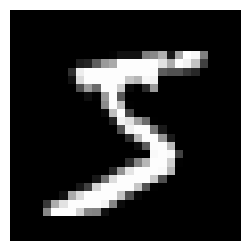

(28, 28, 1)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [18]:
# Show 1st image of the MNIST data set
image = X_train[0]
fig = plt.figure(figsize=(3,3))
plt.axis('off')
plt.imshow(image, cmap='gray')
plt.show()

# Shape 1st image
print(X_train[2].shape)

# y_train 1st image
print(y_train[0])

# X_tain 1st image
# print(X_train[0])


### Define the model architecture

In [19]:
# Define the model architecture
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

### Train the model

In [20]:
# Define number of epochs and batch size
epochs = 10
batch_size = 128

# Train the model
model.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

model.fit(X_train, 
          y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 1s 2ms/step - loss: 0.5359 - accuracy: 0.8427 - val_loss: 0.1933 - val_accuracy: 0.9467
Epoch 2/10
422/422 [==============================] - 1s 2ms/step - loss: 0.2827 - accuracy: 0.9181 - val_loss: 0.1420 - val_accuracy: 0.9613
Epoch 3/10
422/422 [==============================] - 1s 2ms/step - loss: 0.2261 - accuracy: 0.9343 - val_loss: 0.1168 - val_accuracy: 0.9682
Epoch 4/10
422/422 [==============================] - 1s 2ms/step - loss: 0.1959 - accuracy: 0.9412 - val_loss: 0.1021 - val_accuracy: 0.9717
Epoch 5/10
422/422 [==============================] - 1s 2ms/step - loss: 0.1754 - accuracy: 0.9484 - val_loss: 0.0929 - val_accuracy: 0.9743
Epoch 6/10
422/422 [==============================] - 1s 2ms/step - loss: 0.1635 - accuracy: 0.9519 - val_loss: 0.0909 - val_accuracy: 0.9748
Epoch 7/10
422/422 [==============================] - 1s 2ms/step - loss: 0.1502 - accuracy: 0.9551 - val_loss: 0.0907 - val_accuracy: 0.9762
Epoch 

### Evaluate the model

In [21]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {score[0]:.4f}")
print(f"Test accuracy: {score[1]:.4f}")

Test loss: 0.0888
Test accuracy: 0.9732
